# Table of Contents
<ol>
<li><a href="#Introduction">Introduction</a></li>
        <ol>
            <li><a href="Dataset">Dataset</a></li>
            <li><a href="Objectives">Objectives</a></li>
        </ol>
<li><a href="#Logistics#">Logistics</a></li>
    <ol>
        <li><a href="#Import-libraries">Import libraries</a></li>
        <li><a href="#Define-functions">Define functions</a></li>
        <li><a href="#Import-data">Import data</a></li>
    </ol>
<li><a href="#Data-cleaning">Data cleaning</a></li>
<li><a href="#Data-agreggation#">Data agreggation</a></li>
<li><a href="#Analysis">Analysis</a></li>
    <ol>
        <li><a href="#Demographics">Demographics</a></li>
        <li><a href="#Sepsis-diagnoses">Sepsis diagnoses</a></li>
        <li><a href="#Important-predictors">Important predictors</a></li>
        <li><a href="#Hypothesis-testing">Hypothesis testing</a></li>
    </ol>
<li><a href="#Conclusions">Conclusions</a></li>
</ol>

# Introduction

## Dataset
The work presented here is an exploratory data analysis (EDA) of the the *physionet_sepsis* dataset from Kaggle. The data was made available for the **Early Prediction of Sepsis from Clinical Data: The PhysioNet/Computing in Cardiology Challenge 2019**.

Sepsis is a life-threatening condition that occurs when the human body's response to infection causes tissue damage, organ failure, or death. Early detection and treatment are critical, as each hour of delayed treatment has been associated with roughly an 4-8% increase in mortality. The goal of the Challenge was to develop algorithms for the early prediction of sepsis using routinely available clinical data. The researchers obtained the data from three geographically distinct U.S. hospital systems. The data were collected over the past decade, then deidentified (i.e., all information that could identify a patient was removed) and labeled using Sepsis-3 clinical criteria. Data and labels for 40,336 patients from two of the hospital systems A and B were posted publicly for download, and data and labels for 24,819 patients from all three hospital systems were kept as hidden test sets.

The Challenge data consisted of a combination of 8 vital sign summaries, 26 laboratory values, and 6 demographic variables (see Table). Data extracted from the electronic records underwent a series of preprocessing steps. All patient features were condensed into hourly bins; if there were multiple measurements within an an hourly time window, they were summarized as the median value. Furthermore, missing and erroneous data were intentionally preserved as part of the Challenge. 

**Table: Data dictionary**
<table>
<tr><td>Name</td><td>Description</td></tr>
<tr><td>HR  </td><td>Heart rate (beats per minute)</td></tr>
<tr><td>O2Sat</td><td>Pulse oximetry (%)</td></tr>
<tr><td>Temp</td><td>Temperature (Deg C)</td></tr>
<tr><td>SBP</td><td>Systolic BP (mm Hg)</td></tr>
<tr><td>MAP</td><td>Mean arterial pressure (mm Hg)</td></tr>
<tr><td>DBP</td><td>Diastolic BP (mm Hg)</td></tr>
<tr><td>Resp</td><td>Respiration rate (breaths per minute)</td></tr>
<tr><td>EtCO2</td><td>End tidal carbon dioxide (mm Hg)</td></tr>
<tr><td>BaseExcess</td><td>Measure of excess bicarbonate (mmol/L) </td></tr>
<tr><td>HCO3</td><td>Bicarbonate (mmol/L)</td></tr>
<tr><td>FiO2</td><td>Fraction of inspired oxygen (%)</td></tr>
<tr><td>pH</td><td>N/A</td></tr>
<tr><td>PaCO2</td><td>Partial pressure of carbon dioxide from arterial blood (mm Hg)</td></tr>
<tr><td>SaO2</td><td>Oxygen saturation from arterial blood (%)</td></tr>
<tr><td>AST</td><td>Aspartate transaminase (IU/L)</td></tr>
<tr><td>BUN</td><td>Blood urea nitrogen (mg/dL)</td></tr>
<tr><td>Alkalinephos</td><td>Alkaline phosphatase (IU/L)</td></tr>
<tr><td>Calcium</td><td>(mg/dL)</td></tr>
<tr><td>Chloride</td><td>(mmol/L)</td></tr>
<tr><td>Creatinine</td><td>(mg/dL)</td></tr>
<tr><td>Bilirubin_direct</td><td>Bilirubin direct (mg/dL)</td></tr>
<tr><td>Glucose</td><td> Serum glucose (mg/dL)</td></tr>
<tr><td>Lactate</td><td>Lactic acid (mg/dL)</td></tr>
<tr><td>Magnesium </td><td> (mmol/dL) </td></tr>
<tr><td> Phosphate</td><td>(mg/dL) </td></tr>
<tr><td> Potassium  </td><td> (mmol/L) </td></tr>
<tr><td>Bilirubin_total</td><td>Total bilirubin (mg/dL) </td></tr>
<tr><td>TroponinI </td><td> Troponin I (ng/mL)  </td></tr>
<tr><td> Hct</td><td>Hematocrit (%)</td></tr>
<tr><td> Hgb</td><td> Hemoglobin (g/dL) </td></tr>
<tr><td> PTT</td><td> partial thromboplastin time (seconds)</td></tr>
<tr><td> WBC </td><td> Leukocyte count (count*10^3/µL)  </td></tr>
<tr><td> Fibrinogen </td><td>(mg/dL)   </td></tr>
<tr><td>  Platelets </td><td>  (count*10^3/µL) </td></tr>
<tr><td>  Age </td><td> Years (100 for patients 90 or above)  </td></tr>
<tr><td> Gender </td><td> Female (0) or Male (1)</td></tr>
<tr><td>Unit1  </td><td>Administrative identifier for ICU unit (MICU)</td></tr>
<tr><td>Unit2  </td><td>  Administrative identifier for ICU unit (SICU)   </td></tr>
<tr><td>HospAdmTime  </td><td>  Hours between hospital admit and ICU admit  </td></tr>
<tr><td>ICULOS</td><td>ICU length-of-stay (hours since ICU admit)</td></tr>
<tr><td>SepsisLabel</td><td>Sepsis patients: </td>td></tr>tr>
<tr><td></td><td>0, if t < tsepsis−6 </td></tr>
<tr><td></td><td>1, if t ≥ tsepsis−6 </td></tr>
<tr><td></td><td>Non-sepsis patients: 0</td></tr>
</table>

**Links**
* [Kaggle dataset](https://www.openml.org/search?type=data&sort=qualities.NumberOfMissingValues&status=active&qualities.NumberOfFeatures=between_10_100&id=46817)
* [Physionet Challenge 2019](https://physionet.org/content/challenge-2019/1.0.0/)

**References**
1. Reyna MA, Josef CS, Jeter R, Shashikumar SP, Westover MB, Nemati S, Clifford GD, Sharma A. Early Prediction of Sepsis From Clinical Data: The PhysioNet/Computing in Cardiology Challenge. Critical Care Medicine 48 2: 210-217 (2019). https://doi.org/10.1097/CCM.0000000000004145

2. Reyna, M., Josef, C., Jeter, R., Shashikumar, S., Moody, B., Westover, M. B., Sharma, A., Nemati, S., & Clifford, G. D. (2019). Early Prediction of Sepsis from Clinical Data: The PhysioNet/Computing in Cardiology Challenge 2019 (version 1.0.0). PhysioNet. RRID:SCR_007345. https://doi.org/10.13026/v64v-d857

3. Goldberger, A., Amaral, L., Glass, L., Hausdorff, J., Ivanov, P. C., Mark, R., ... & Stanley, H. E. (2000). PhysioBank, PhysioToolkit, and PhysioNet: Components of a new research resource for complex physiologic signals. Circulation [Online]. 101 (23), pp. e215–e220. RRID:SCR_007345.

## Objectives
* Preprocess and clean the data for further analysis
* Engineer features to enhance insights
* Employ visualizations to explore data patterns and trends
* Conduct hypothesis testing to validate assumptions

# Logistics

## Import libraries
Do all the import operations in one place.

In [1]:
import os
import sqlite3 as sq3
import pandas.io.sql as pds
import pandas as pd
import numpy as np
import openpyxl #python library for Excel
from scipy.stats import norm
from scipy import stats
import datetime 
import requests
import json
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, silhouette_score
from sklearn.cluster import KMeans

import kagglehub

import matplotlib as mpl
import plotly.express as px
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])
import seaborn as sns
sns.set()
sns.set_context('notebook', 1.1) # font scaling for notebook

# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

## Define functions
I like to automate work if possible. Depending on the type of analysis, there will be different functions defined here.

In [2]:
# Define a function that checks for duplicates and outputs a message
def check_duplicates(data):
    s = sum(data.duplicated())
    if s == 0:
        print('There are no duplicated observations in the data...')
    else:
        dupl = data.duplicated(keep = False).reset_index() 
        # I want to see *all* the rows that are identical, incl the 1st occurrence, use keep = False
        # there is a column named 0 in dupl, rename it
        dupl = dupl.rename(columns ={0:'value'})
        print('The following rows are identical: ', dupl[dupl['value'] == True].index.tolist())

In [3]:
# Define a function that plots physiological variables along with normal ranges and marks when sepsis diagnosis was set for the 1st time
def feature_lineplots(feature, data):
    fig = plt.figure(figsize=(8,24))
    plt.suptitle(feature, fontweight = 'bold', size = 18)
    i = 0
    j = 1

    #min_feature = data[['Patient_ID',feature+'_min']]
    #max_feature = data[['Patient_ID',feature+'_max']]

    # show lab normal ranges for the variables on each plot
    normal_range = (1e12,0) # in case we don't have these values for some variables
    if feature == 'Lactate_mg_dL':
        normal_range = (4.5, 19.8)
    if feature == 'WBC_cnt_L':
        normal_range = (4.0, 10.0)
    if feature == 'Platelets_cnt_mL':
        normal_range = (150, 350)
    if feature == 'Fibrinogen_mg_dL':
        normal_range = (200,400)
    
    for id in data['Patient_ID'].tolist():
        df2 = df[df['Patient_ID'] == id]
        #print('label: ', df2['SepsisLabel'].max())
        start_time = df2['Hour'].min()
        end_time = df2['Hour'].max()
        
        if (df2['SepsisLabel'].max() == 0):
            axs0 = fig.add_subplot(6, 2, 2*i + 1)       
            sns.lineplot(data = df2, x ='Hour', y = feature, ax = axs0 )
            
            if i == 0:
                axs0.set_title('Non-sepsis')
            i = i+1

        if (df2['SepsisLabel'].max() == 1):
            axs0= fig.add_subplot(6,2,2*j)
            sns.lineplot(data = df2, x ='Hour', y = feature, ax = axs0 )
            sepsis_time = df2[df2['SepsisLabel']==1]['Hour'].to_list()
            
            # show lines when sepsis was declared
            #for x in sepsis_time:
            plt.axvline( x= sepsis_time[0], color = 'red', linestyle = '--', alpha = 0.5)
            
            if j == 1:
                axs0.set_title('Sepsis (with onset timestamp)')
            j = j+1

        # Plot normal ranges on all plots
        plt.axhline(y = normal_range[0], color = 'green', linestyle = '--', alpha = 0.5)
        plt.axhline(y = normal_range[1], color = 'green', linestyle = '--', alpha = 0.5)
        
        #ymin = np.float64(min_feature[min_feature['Patient_ID'] == id][feature+'_min'])
        #ymax = np.float64(max_feature[max_feature['Patient_ID'] == id][feature+'_max'])
        ymin = df2[feature].min()
        ymax = df2[feature].max()
        ymin = min(ymin, normal_range[0])
        ymax = max(ymax, normal_range[1])
        
        if feature == 'Lactate_mg_dL':
            ymin = 0
            ymax = 12.5
            
        #axs0.set_xlim(start_time, end_time)
        axs0.set_ylim(ymin*0.9, ymax*1.1)
        
    fig.tight_layout()

## Import data

The dataset is provided as ARFF (Attribute-Relation File Format), a text file format developed by the University of Waikato and used by the Weka machine learning software to store datasets. The dataset was downloaded and stored locally.

In [4]:
file = 'dataset_sepsis_1.arff'

In [5]:
from scipy.io import arff
data_raw =arff.loadarff(file)

# Convert to DataFrame
data = pd.DataFrame(data_raw[0])

**Always work on a copy of the data.**

In [6]:
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 44 columns):
 #   Column                                                            Non-Null Count    Dtype  
---  ------                                                            --------------    -----  
 0   Unnamed__0                                                        1552210 non-null  float64
 1   Hour                                                              1552210 non-null  float64
 2   Heart_rate__in_beats_per_minute                                   1398811 non-null  float64
 3   Pulse_oximetry__percentage                                        1349474 non-null  float64
 4   Temperature__deg_C                                                525226 non-null   float64
 5   Systolic_BP__mm_Hg                                                1325945 non-null  float64
 6   Mean_arterial_pressure__mm_Hg                                     1358940 non-null  float64
 7   Diastolic

In [7]:
df.head()

,Unnamed__0,Hour,Heart_rate__in_beats_per_minute,Pulse_oximetry__percentage,Temperature__deg_C,Systolic_BP__mm_Hg,Mean_arterial_pressure__mm_Hg,Diastolic_BP__mm_Hg,Respiration_rate__breaths_per_minute,End_tidal_carbon_dioxide__mm_Hg,...,Fibrinogen_concentration__mg_dL,Platelet_count__count_mL,Age__years,Female__0__or_male__1,Administrative_identifier_for_ICU_unit__MICU___false__0__or_true,Administrative_identifier_for_ICU_unit__SICU___false__0__or_true,Time_between_hospital_and_ICU_admission__hours_since_ICU_admissi,ICU_length_of_stay__hours_since_ICU_admission,SepsisLabel,Patient_ID
0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0.0,NaN,NaN,-0.02,1.0,b'0',17072.0
1,1.0,1.0,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0.0,NaN,NaN,-0.02,2.0,b'0',17072.0
2,2.0,2.0,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0.0,NaN,NaN,-0.02,3.0,b'0',17072.0
3,3.0,3.0,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0.0,NaN,NaN,-0.02,4.0,b'0',17072.0
4,4.0,4.0,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0.0,NaN,NaN,-0.02,5.0,b'0',17072.0


# Data cleaning

The following were observed from a quick glance at the information returned by `df.info()` and `df.head()`:
* In addition to the data description in Section1, there are two columns, *Unnamed__0* and *Patient_ID*; however, *Unnamed__0* appears to be the same information as *Hour*
* There is an outstanding number of missing values

**Initial operations**

The following operations will be performed on the data:

* If *Unamed_0* and Hour are the same data, remove *Unnamed__0*
* Rename columns, based on the Data dictionary in Section 1 (the names are too long and may make further analysis cumbersome)
* Check for duplicated observations (rows)
* Convert *SepsisLabel* from object to integer
* Convert demographic data (gender) from float to integer
* Determine the number of unique patients
* Characterize the missing data

**Compare columns Unnamed__0 and Hour element by element; if identical, drop Unnamed__0** 

If they are identical, `df['Unnamed__0'] == df['Hour']` will equal 1 for each element, so a sum of the results of the boolean operation will equal the number of rows in the data frame. If that is the case, remove *Unnamed__0.*

In [8]:
sum(df.iloc[:,0] == df.iloc[:,1]) == df.shape[0]

True

In [9]:
df = df.drop(['Unnamed__0'], axis = 1)

**Rename columns**

In [10]:
df = df.rename(columns = {'Heart_rate__in_beats_per_minute':'HR','Pulse_oximetry__percentage':'O2SAT_%',
                          'Temperature__deg_C':'Temp_degC',
                          'Systolic_BP__mm_Hg':'SBP_mmHg',
                          'Diastolic_BP__mm_Hg':'DBP_mmHg',
                          'Mean_arterial_pressure__mm_Hg':'MAP_mmHg',
                          'Respiration_rate__breaths_per_minute':'Resp_rate',
                          'End_tidal_carbon_dioxide__mm_Hg':'EtCO2_mmHg',
                          'Excess_bicarbonate__mmol_L':'BaseExcess_mmol_L',
                          'Bicarbonate__mmol_L':'HCO3_mmol_L',
                          'Fraction_of_inspired_oxygen__percentage':'FiO2_%',                                                                                      
                          'Partial_pressure_of_carbon_dioxide_from_arterial_blood__mm_Hg':'PaCO2_mmHg',
                          'Oxygen_saturation_from_arterial_blood__percentage':'SaO2_%',
                          'Aspartate_transaminase__IU_L':'AST_IU_L',                                   
                          'Blood_urea_nitrogen__mg_dL':'BUN_mg_dL',                              
                          'Alkaline_phosphatase__IU_L':'Alkalinephos_IU_L',               
                          'Calcium__mg_dL':'Calcium_mg_dL',
                          'Chloride__mmol_L':'Chloride_mmol_L',
                          'Creatinine__mg_dL':'Creatinine_mg_dL',
                          'Direct_bilirubin__mg_dL':'Bilirubin_direct_mg_dL',
                          'Serum_glucose__mg_dL':'Glucose_mg_dL',                       
                          'Lactic_acid__mg_dL':'Lactate_mg_dL',                                   
                          'Magnesium__mmol_dL':'Magnesium_mmol_L',                                     
                          'Phosphate__mg_dL':'Phosphate_mg_dL',                                   
                          'Potassium__mmol_L':'Potassium_mmol_L',                                     
                          'Total_bilirubin__mg_dL':'Bilirubin_total_mg_dL',                                    
                          'Troponin_I__ng_mL':'TroponinI_ng_mL',                        
                          'Hematocrit__percentage':'Hct_%',                                    
                          'Hemoglobin__g_dL':'Hgb_g_dL',                                     
                          'Partial_thromboplastin_time__seconds':'PTT_s',
                          'Leukocyte_count__count_L':'WBC_cnt_L',                       
                          'Fibrinogen_concentration__mg_dL':'Fibrinogen_mg_dL',
                          'Platelet_count__count_mL':'Platelets_cnt_mL',
                          'Female__0__or_male__1':'Gender',
                          'Administrative_identifier_for_ICU_unit__MICU___false__0__or_true':'Unit1',
                          'Administrative_identifier_for_ICU_unit__SICU___false__0__or_true': 'Unit2',
                          'ICU_length_of_stay__hours_since_ICU_admission': 'ICULOS',
                          'Time_between_hospital_and_ICU_admission__hours_since_ICU_admissi':'HospAdmTime', 
                          'Age__years':'Age'})

In [11]:
df.head().T

,0,1,2,3,4
Hour,0.0,1.0,2.0,3.0,4.0
HR,NaN,65.0,78.0,73.0,70.0
O2SAT_%,NaN,100.0,100.0,100.0,100.0
Temp_degC,NaN,NaN,NaN,NaN,NaN
SBP_mmHg,NaN,NaN,NaN,NaN,129.0
MAP_mmHg,NaN,72.0,42.5,NaN,74.0
DBP_mmHg,NaN,NaN,NaN,NaN,69.0
Resp_rate,NaN,16.5,NaN,17.0,14.0
EtCO2_mmHg,NaN,NaN,NaN,NaN,NaN
BaseExcess_mmol_L,NaN,NaN,NaN,NaN,NaN


**Check for duplicated rows and remove them if they exist**

In [12]:
check_duplicates(df)

There are no duplicated observations in the data...


**Convert demographic data (gender) and the sepsis label to integer**

In [13]:
df['Gender'] = df['Gender'].astype(int)
df['SepsisLabel']=df['SepsisLabel'].astype(int)

**Determine the number of unique patients and their IDs**

In [14]:
patient_IDs = df.Patient_ID.unique()
print('Number of patients in the dataset: ',patient_IDs.shape[0])

Number of patients in the dataset:  40336


**Identify the features with most missing data**

In [15]:
df.isnull().sum().map(lambda x: np.round(x/df.shape[0]*100,1)).sort_values()

Hour                       0.0
HospAdmTime                0.0
Patient_ID                 0.0
SepsisLabel                0.0
ICULOS                     0.0
Age                        0.0
Gender                     0.0
HR                         9.9
MAP_mmHg                  12.5
O2SAT_%                   13.1
SBP_mmHg                  14.6
Resp_rate                 15.4
DBP_mmHg                  31.3
Unit2                     39.4
Unit1                     39.4
Temp_degC                 66.2
Glucose_mg_dL             82.9
Potassium_mmol_L          90.7
Hct_%                     91.1
FiO2_%                    91.7
Hgb_g_dL                  92.6
pH                        93.1
BUN_mg_dL                 93.1
WBC_cnt_L                 93.6
Magnesium_mmol_L          93.7
Creatinine_mg_dL          93.9
Platelets_cnt_mL          94.1
Calcium_mg_dL             94.1
PaCO2_mmHg                94.4
BaseExcess_mmol_L         94.6
Chloride_mmol_L           95.5
HCO3_mmol_L               95.8
Phosphat

**Observations**
* The dataset consists of observations for 40,336 unique patients
* There are multiple observations (rows) for each patient, leading to a total of 1,552,210 observations
* Important predictors for inflammation and organ damage have over 80% missing entries; removing the observations with missing values is therefore not an option
* Imputation by replacing with mean or median is also not a viable approach, considering the amount of missing data, and, most importantly, that sepsis is an unstable condition

# Data aggregation

In order to address the multiple observations per patient, data will be aggregated such that there is one entry per patient, and the resulting dataset will be used for exploratory analysis. Since many features have very few data points, new features will be created, to hold the mean values of physiological variables (min and max could also be used, but they are potentially correlated). 

In the next task, for each patient, new features are created: the total time they were under observation  (*TotalTime_hrs*), and the minimum and maximum values of the measured physiological variables in columns 1 through 35 (heart rate through platelet count). Age and gender are constant, so they are processed separately. The dataset also includes a SepsisLabel, which is calculated as the maximum value of the all the entries in this column for a particular patient (0 if the patient was never diagnosed with sepsis, and 1, if the patient was diagnoses with sepsis at any time during his/her hospital stay).

In [16]:
df1 = df.groupby('Patient_ID')['Hour'].max().reset_index()
df1 = df1.rename(columns = {'Hour':'TotalTime_hrs'})

df2 = df.groupby('Patient_ID')['SepsisLabel'].max().reset_index()
df1 = df1.merge(df2, on = 'Patient_ID')

# physiological variables
selection = df.columns[1:35]
for item in selection:
    df2 = df.groupby('Patient_ID')[item].mean().reset_index()
    str1 = item + '_mean'
    df2 = df2.rename(columns={item: str1})
    df1= df1.merge(df2, on ='Patient_ID')

selection = ['Age','Gender']
for item in selection:
    df2 = df.groupby('Patient_ID')[item].mean().astype(int).reset_index()
    df1 = df1.merge(df2,on = 'Patient_ID')
df1

,Patient_ID,TotalTime_hrs,SepsisLabel,HR_mean,O2SAT_%_mean,Temp_degC_mean,SBP_mmHg_mean,MAP_mmHg_mean,DBP_mmHg_mean,Resp_rate_mean,...,Bilirubin_total_mg_dL_mean,TroponinI_ng_mL_mean,Hct_%_mean,Hgb_g_dL_mean,PTT_s_mean,WBC_cnt_L_mean,Fibrinogen_mg_dL_mean,Platelets_cnt_mL_mean,Age,Gender
0,1.0,53.0,0,101.571429,91.477273,36.778000,126.809524,87.261905,NaN,24.820000,...,0.300000,NaN,36.700000,12.350000,NaN,10.200000,NaN,327.500000,83,0
1,2.0,22.0,0,60.954545,97.000000,36.165000,136.600000,66.704545,44.066667,14.236842,...,NaN,NaN,27.800000,9.700000,NaN,11.000000,NaN,158.000000,75,0
2,3.0,47.0,0,79.611111,95.431818,37.609375,140.033333,81.048000,54.392857,25.633333,...,NaN,NaN,28.650000,9.633333,30.0,9.000000,NaN,479.666667,45,0
3,4.0,28.0,0,102.444444,98.203704,36.455000,113.019231,67.147308,51.428571,18.884615,...,NaN,NaN,25.800000,8.300000,21.8,7.600000,NaN,182.000000,65,0
4,5.0,47.0,0,73.916667,97.500000,36.992222,132.770833,87.088235,NaN,16.500000,...,0.566667,NaN,42.133333,14.700000,29.0,6.933333,NaN,279.000000,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40331,119996.0,47.0,0,89.456522,98.086957,36.400000,131.366667,84.602273,71.922222,19.176471,...,3.300000,0.01,42.700000,13.800000,NaN,12.600000,NaN,238.000000,84,0
40332,119997.0,24.0,0,61.062500,96.833333,36.800000,119.562500,90.937500,70.250000,20.384615,...,0.700000,1.09,46.700000,15.550000,38.2,10.400000,NaN,189.000000,30,1
40333,119998.0,48.0,0,80.202381,96.255814,36.733333,157.526316,116.157895,88.644737,20.578947,...,0.200000,NaN,27.966667,8.471429,NaN,12.266667,NaN,197.333333,60,0
40334,119999.0,19.0,0,94.333333,92.722222,37.620000,141.722222,100.833333,74.416667,21.666667,...,1.000000,NaN,23.066667,7.733333,NaN,10.700000,NaN,263.500000,84,0


In [17]:
print('New dataset size: ', df1.shape)

New dataset size:  (40336, 39)


**Missing data in the new dataset**

Investigate which features have the most missing data in the new dataset; display features with more than 30% of values missing. Note that there is still missing data, as some patients did not have all the physiological variables measured. An example of such a patient follows.

<Axes: ylabel='Feature'>

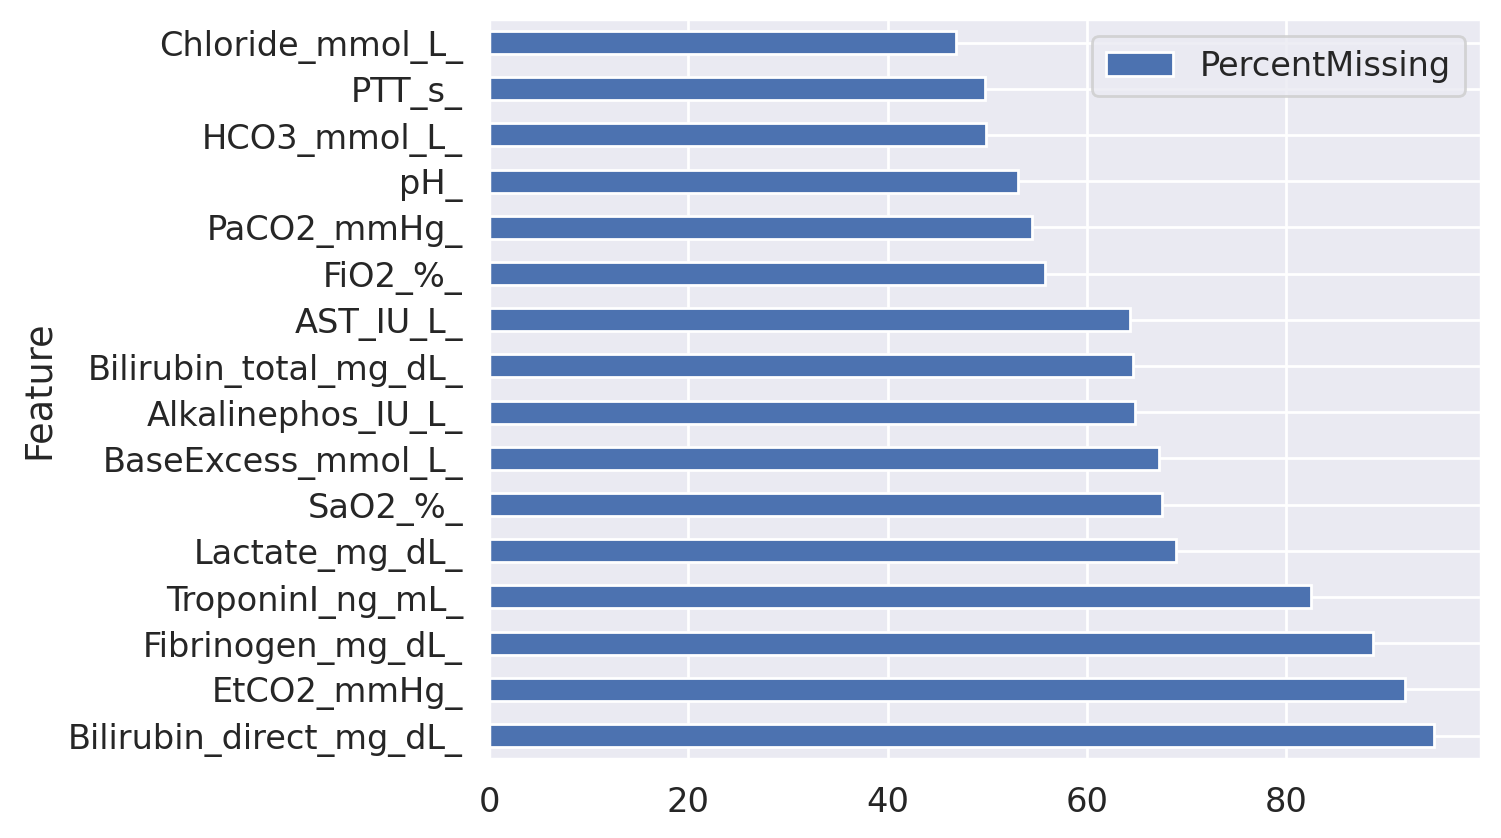

In [18]:
df1_nulls = df1.isnull().sum().map(lambda x: np.round(x/df1.shape[0]*100,1)).sort_values(ascending= False).reset_index()
df1_nulls = df1_nulls.rename(columns={'index':'Feature',0:'PercentMissing'})
df1_nulls = df1_nulls[df1_nulls['PercentMissing'] > 30.0]
df1_nulls = df1_nulls[df1_nulls['Feature'].str.contains('mean')]
df1_nulls['Feature'] = df1_nulls['Feature'].map(lambda x: x.split('mean')[0])
df1_nulls.set_index('Feature').plot(kind = 'barh')

For example, patient with ID 16153 does not have total bilirubin recorded.

In [19]:
id = patient_IDs.tolist()[1]
print('Bilirubin total for id = ', id)
df[df['Patient_ID'] == id]['Bilirubin_total_mg_dL']

Bilirubin total for id =  16153.0


43   NaN
44   NaN
45   NaN
46   NaN
47   NaN
48   NaN
49   NaN
50   NaN
51   NaN
52   NaN
53   NaN
54   NaN
55   NaN
56   NaN
57   NaN
58   NaN
Name: Bilirubin_total_mg_dL, dtype: float64

**Identify patients with complete data**

Only 11 patients have no missing data. There are 5 sepsis patients and 6 non-sepsis patients in this subset.

In [20]:
complete_cases = df1.dropna(axis = 0, how = 'any')
complete_cases

,Patient_ID,TotalTime_hrs,SepsisLabel,HR_mean,O2SAT_%_mean,Temp_degC_mean,SBP_mmHg_mean,MAP_mmHg_mean,DBP_mmHg_mean,Resp_rate_mean,...,Bilirubin_total_mg_dL_mean,TroponinI_ng_mL_mean,Hct_%_mean,Hgb_g_dL_mean,PTT_s_mean,WBC_cnt_L_mean,Fibrinogen_mg_dL_mean,Platelets_cnt_mL_mean,Age,Gender
20466,100131.0,41.0,0,71.859375,96.230769,36.644444,102.921875,81.046875,57.187500,18.450000,...,0.700000,0.010000,22.920000,8.335000,61.500000,6.875000,211.000000,134.833333,71,1
23181,102846.0,58.0,0,75.663265,95.897959,36.956000,117.645833,80.843750,61.302083,21.287234,...,0.500000,5.875000,36.300000,12.922727,35.750000,10.825000,306.000000,220.000000,67,1
23542,103207.0,76.0,1,76.384058,99.014925,37.115000,134.485294,75.977941,52.014706,19.514706,...,0.766667,4.470000,25.123077,8.738462,38.733333,7.614286,555.666667,163.777778,55,1
24788,104453.0,50.0,0,98.250000,95.662500,36.729167,129.153846,94.328947,74.346154,19.325000,...,1.000000,5.995000,33.033333,12.033333,32.100000,14.466667,456.666667,283.500000,60,1
26749,106414.0,55.0,0,76.966667,98.100000,37.690909,159.261364,92.954545,63.715909,20.833333,...,0.300000,0.075000,25.766667,9.450000,102.000000,8.880000,378.500000,137.200000,65,0
28247,107912.0,26.0,1,101.956522,98.760870,35.778261,137.586957,99.413043,80.108696,22.086957,...,3.800000,2.400000,24.243750,8.812500,49.733333,9.160000,136.600000,78.000000,52,1
28861,108526.0,51.0,0,73.813953,100.000000,36.411765,114.302326,73.534884,45.337209,20.464286,...,0.700000,6.543333,25.512500,9.350000,52.050000,8.933333,385.000000,310.500000,66,1
29483,109148.0,95.0,1,87.500000,93.109756,36.341279,166.767442,94.738372,66.418605,1.000000,...,3.660000,3.295714,32.083333,14.800000,34.100000,16.380000,447.500000,100.666667,68,0
32751,112416.0,204.0,1,86.421875,91.870833,35.595000,80.270833,76.286458,73.796875,19.657738,...,11.440000,70.000000,24.847368,8.815789,69.407692,31.407692,212.800000,97.285714,58,1
34503,114168.0,265.0,0,67.941441,95.066667,37.099648,146.784722,96.388889,71.738426,21.280788,...,1.700000,1.410000,25.250000,9.159091,34.980000,11.864286,195.166667,87.687500,62,1


# Analysis

## Demographics

**Five-point summary and histograms**

In [21]:
df1['Age'].describe().map(lambda x: np.round(x,0))

count    40336.0
mean        61.0
std         16.0
min         14.0
25%         51.0
50%         63.0
75%         74.0
max        100.0
Name: Age, dtype: float64

<Figure size 640x480 with 0 Axes>

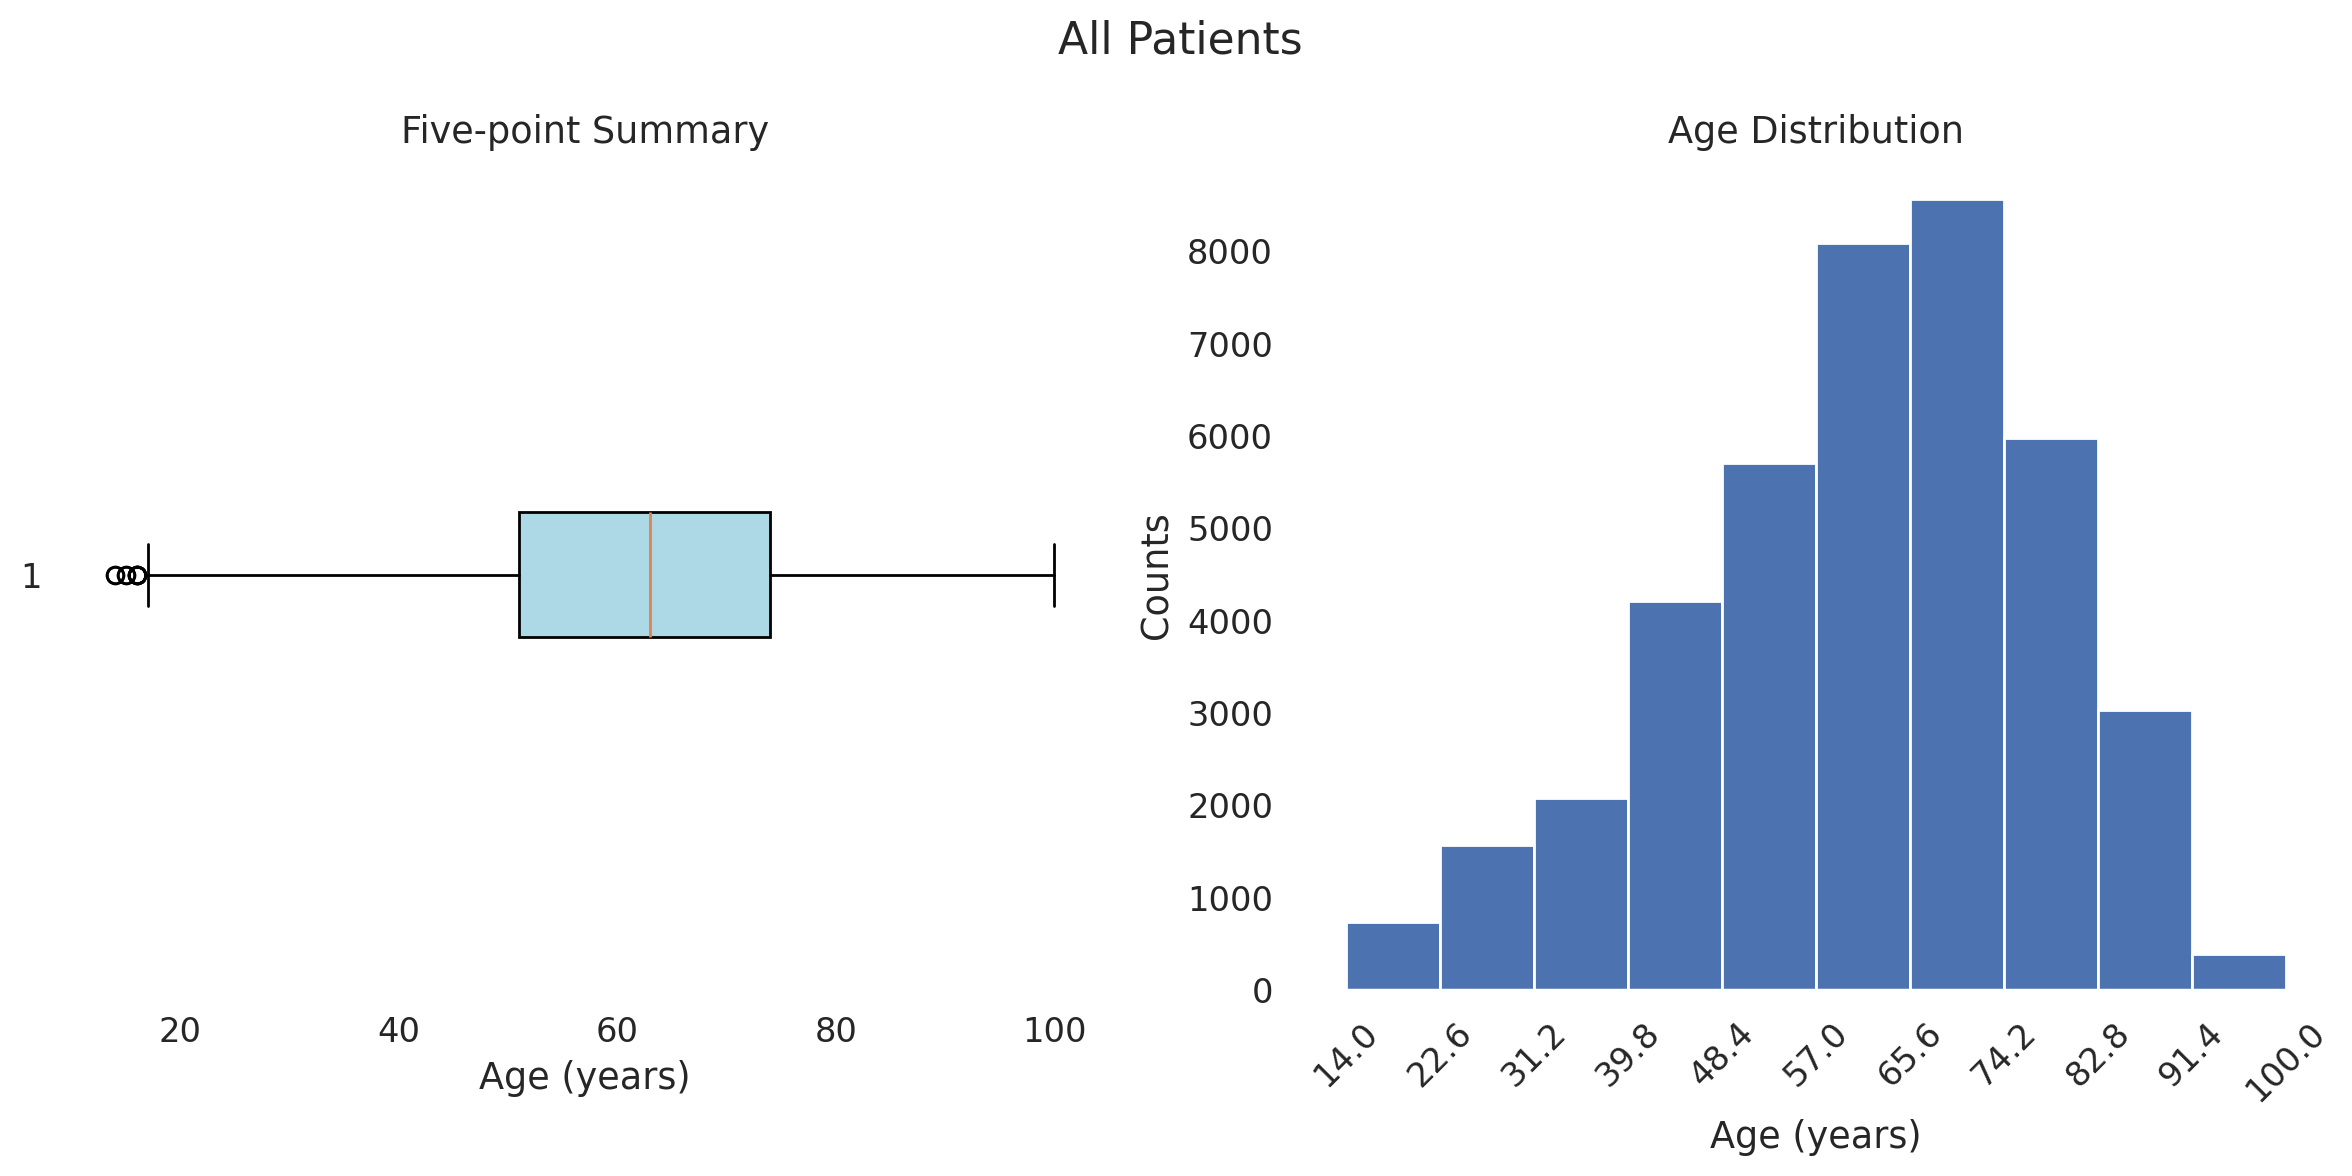

In [22]:
plt.figure(facecolor = 'white')
fig, ax = plt.subplots(1,2,facecolor = 'white', figsize = (12,6))
ax[0].set_facecolor('white')
bplot = ax[0].boxplot(df1['Age'], vert= False, patch_artist = True)
#bplot['boxes'] is a list, with one element in this case
bplot['boxes'][0].set_facecolor('lightblue')
ax[0].set_xlabel('Age (years)')
ax[0].set_title('Five-point Summary')

ax[1].set_facecolor('white')
ax[1].hist(df1['Age'], bins = 10 )
ax[1].set_xlabel('Age (years)')
ax[1].set_ylabel('Counts')
ax[1].set_title('Age Distribution')

plt.xticks(np.histogram_bin_edges(df1['Age'], bins = 10), rotation = 45)
fig.suptitle('All Patients')
fig.tight_layout()

In [23]:
from scipy.stats import skew, kurtosis
skewness = np.round(skew(df1['Age'], bias=False),3)
kurtosis_val = np.round(kurtosis(df1['Age'], bias=False),3)
print('Skewness: ',skewness)
print('Kurtosis: ',kurtosis_val)

Skewness:  -0.425
Kurtosis:  -0.225


**Observations** 
* Median age is 63, minimum age is 14, and maximum age is 100 (per the references cites in Section 1, age 100 includes all patients above 90)
* A few outliers are present, they are the very young patients
* The outliers cause a thin-tailed mild left skew

## Sepsis diagnoses
**Percentage of sepis cases out of the entire patient population.**
Sepsis occurred in about 7% of patients; it is a relatively infrequent occurrence. We have imbalanced classes, which will have to accounted for in predictive modeling tasks.

In [24]:
df1['SepsisLabel'].value_counts().map(lambda x: round(x/df1.shape[0]*100,1)).reset_index()

,SepsisLabel,count
0,0,92.7
1,1,7.3


**Distribution of sepsis cases by gender.** The fraction of patients diagnosed with sepsis is similar for both male and female (7 - 8%).

In [25]:
df3 = df1['Gender'].value_counts().sort_values().reset_index().rename(columns = {'count':'GenderTotal'})
df3 = df1.groupby('Gender')['SepsisLabel'].value_counts().reset_index().rename(columns = {'count':'SepsisTotal'}).merge(df3, on ='Gender')
df3['Percent'] = np.round(df3['SepsisTotal']/df3['GenderTotal']*100,1)
df3

,Gender,SepsisLabel,SepsisTotal,GenderTotal,Percent
0,0,0,16577,17770,93.3
1,0,1,1193,17770,6.7
2,1,0,20827,22566,92.3
3,1,1,1739,22566,7.7


**Distributions of sepsis cases by age.**
The age distributions in both diagnostic groups are left-skewed, due to the presence of very young patients.

In [26]:
mpl.style.use(['seaborn-v0_8-white'])

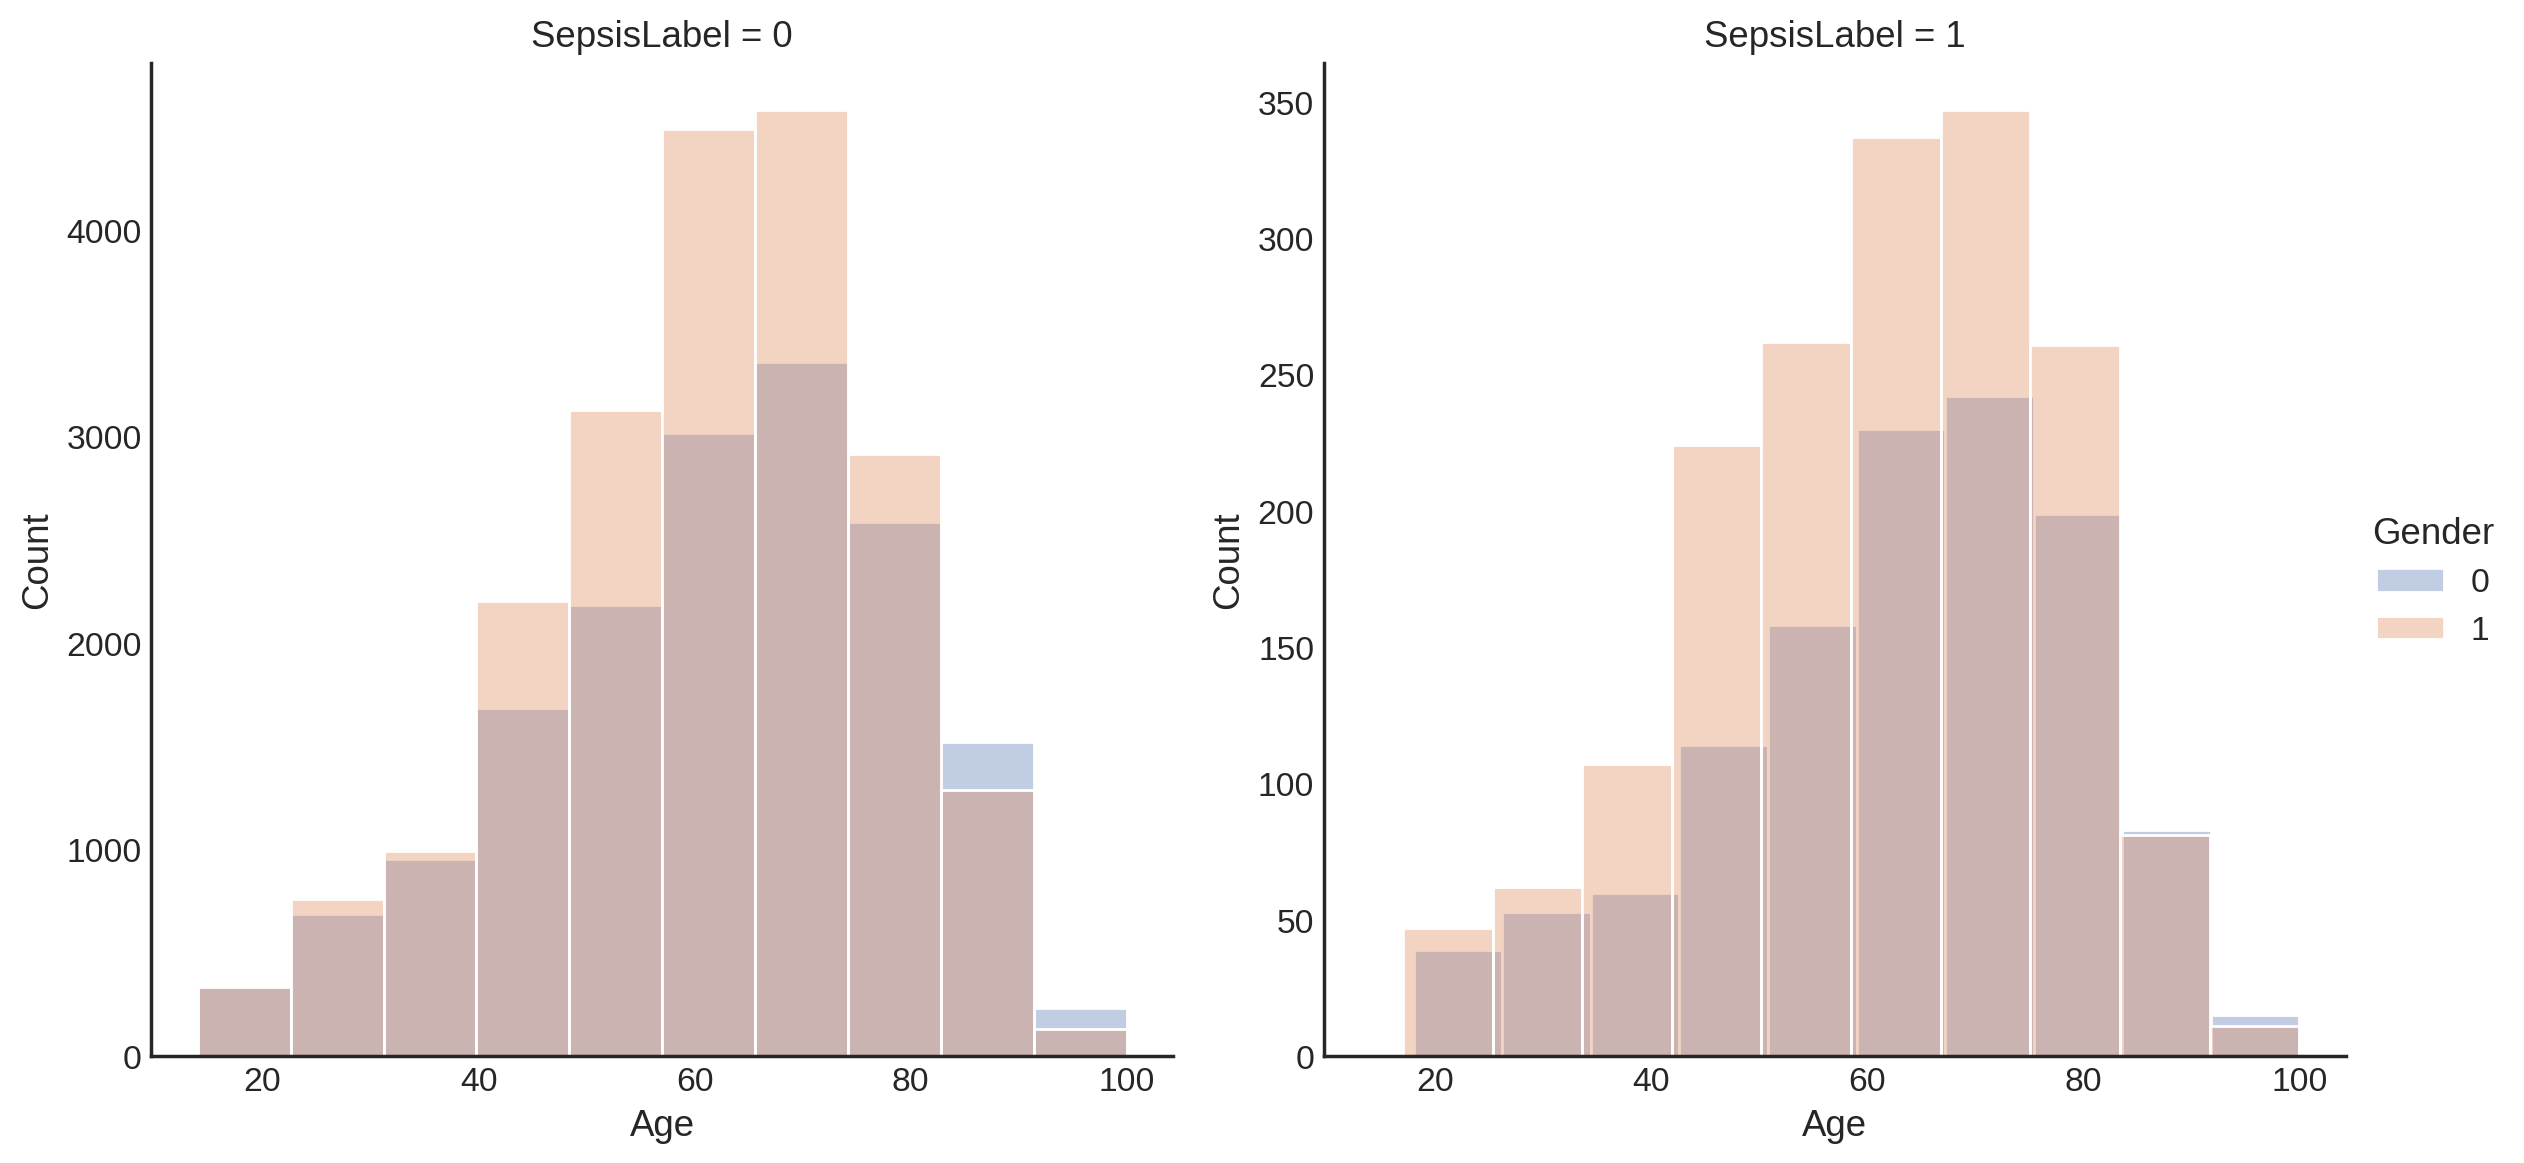

In [27]:
g = sns.FacetGrid(df1, col = 'SepsisLabel', hue = 'Gender', sharey = False, height = 6, aspect = 1)
g.map(sns.histplot, 'Age', bins = 10, alpha = 0.35)
g.add_legend(title='Gender')

## Important predictors
In order to identify features that could be relevant in the early prediction of sepsis, two approaches will be presented here. In the first approach, the most relevant features will be selected based on visualization and subject matter expertise. In the second approach, automated feature selection will be used, as described later. 

**Visualization of changes in physiological variables** 

 The time variation for all the physiological variables was plotted using the function defined in Section 3. The three variables deemed the most relevant, considering the available data and the fact that not all patients have all the measurements, are presented here. They are lactate levels, the platelet count, and the white blood cell count. The 11 patients with the most complete information were selected for plotting.

The variables are plotted against time for each patient. On each plot, normal ranges are shown in green; these values are laboratory-dependent and are available from a variety of sources, such as the Mayo Clinic, Quest Diagnostics, or Labcorp. For lactate, for the purpose of improving visualization, only the lower limit of the range is shown, as none of the patients in this dataset exceeded the lactate upper normal limit. The time when the sepsis diagnosis was set is marked in red. The left column contains the data for the non-sepsis patients, and the right column contains the sepsis group. 

A discussion will follow to address whether the two patient groups share similar characteristics.

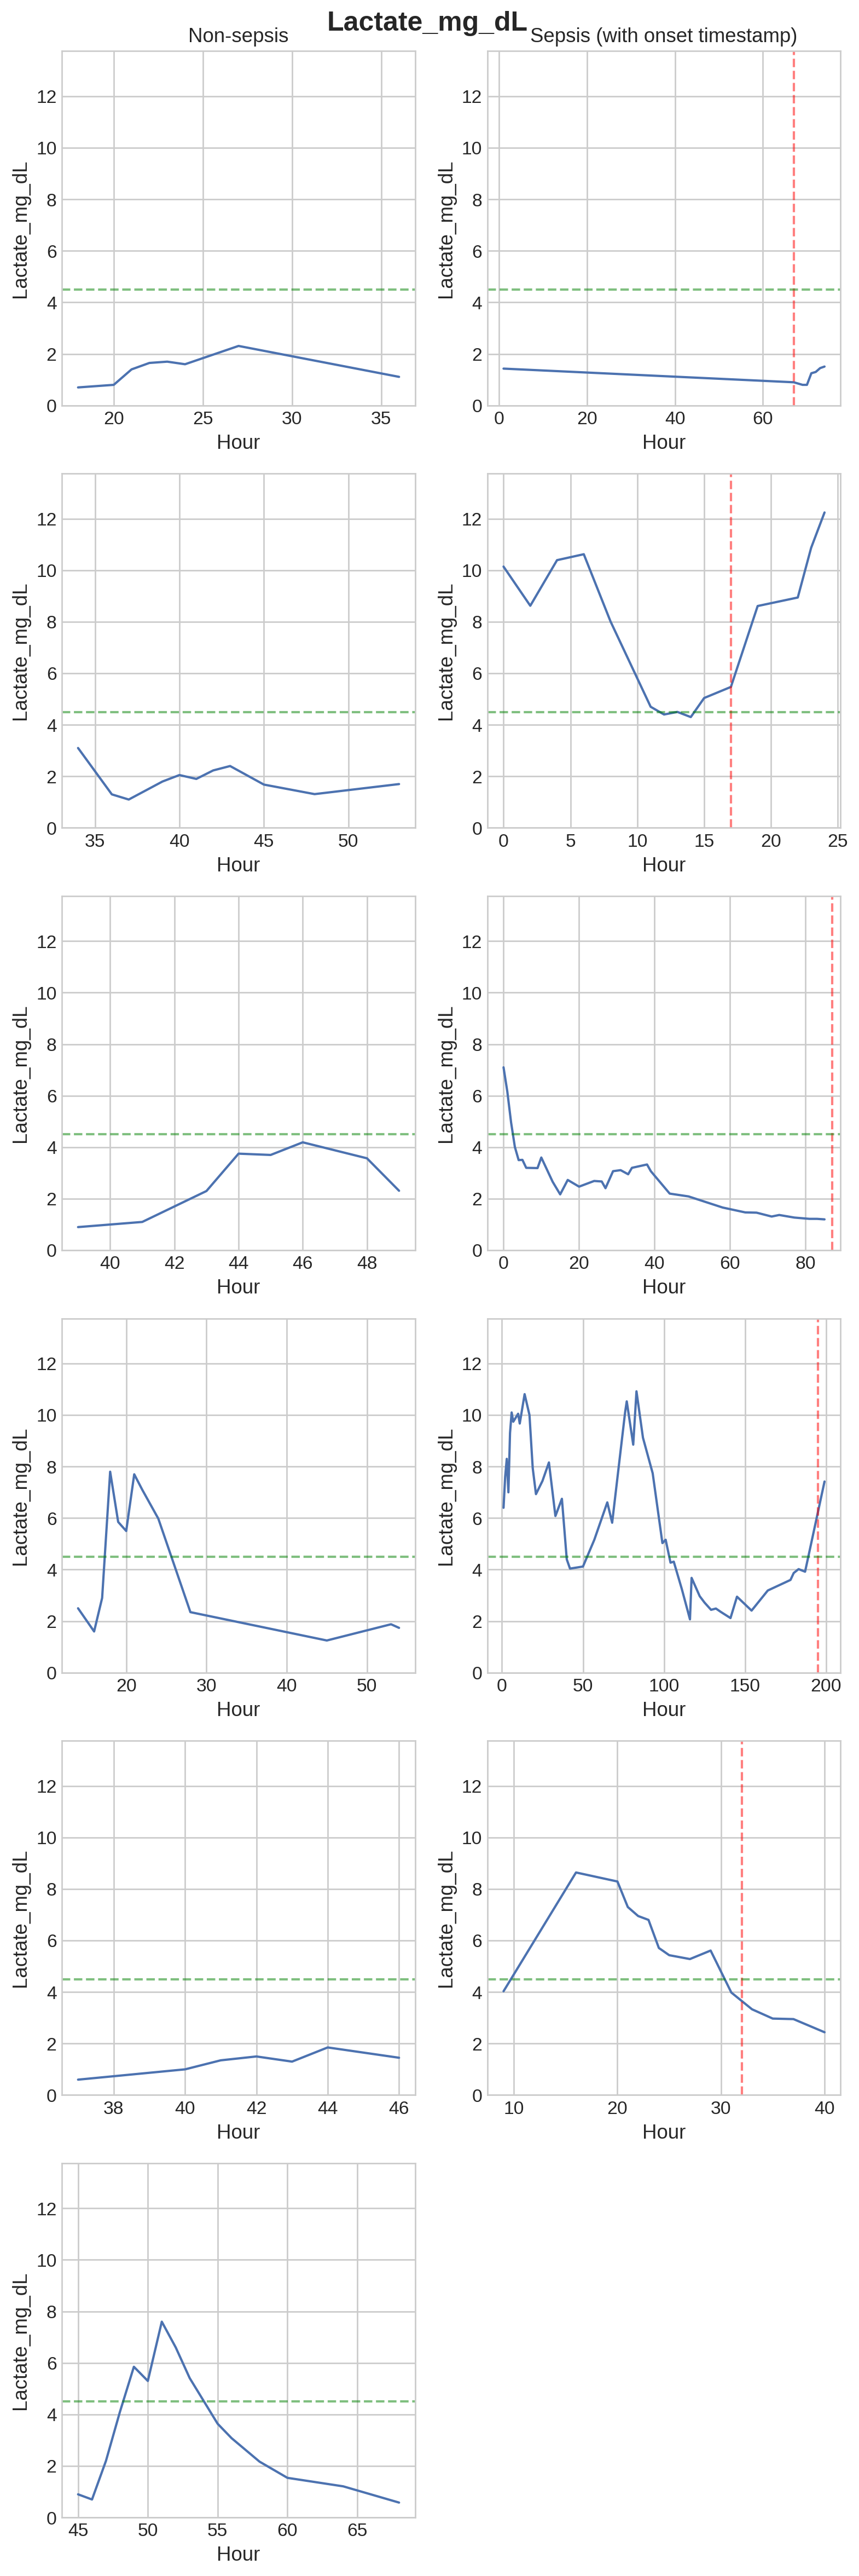

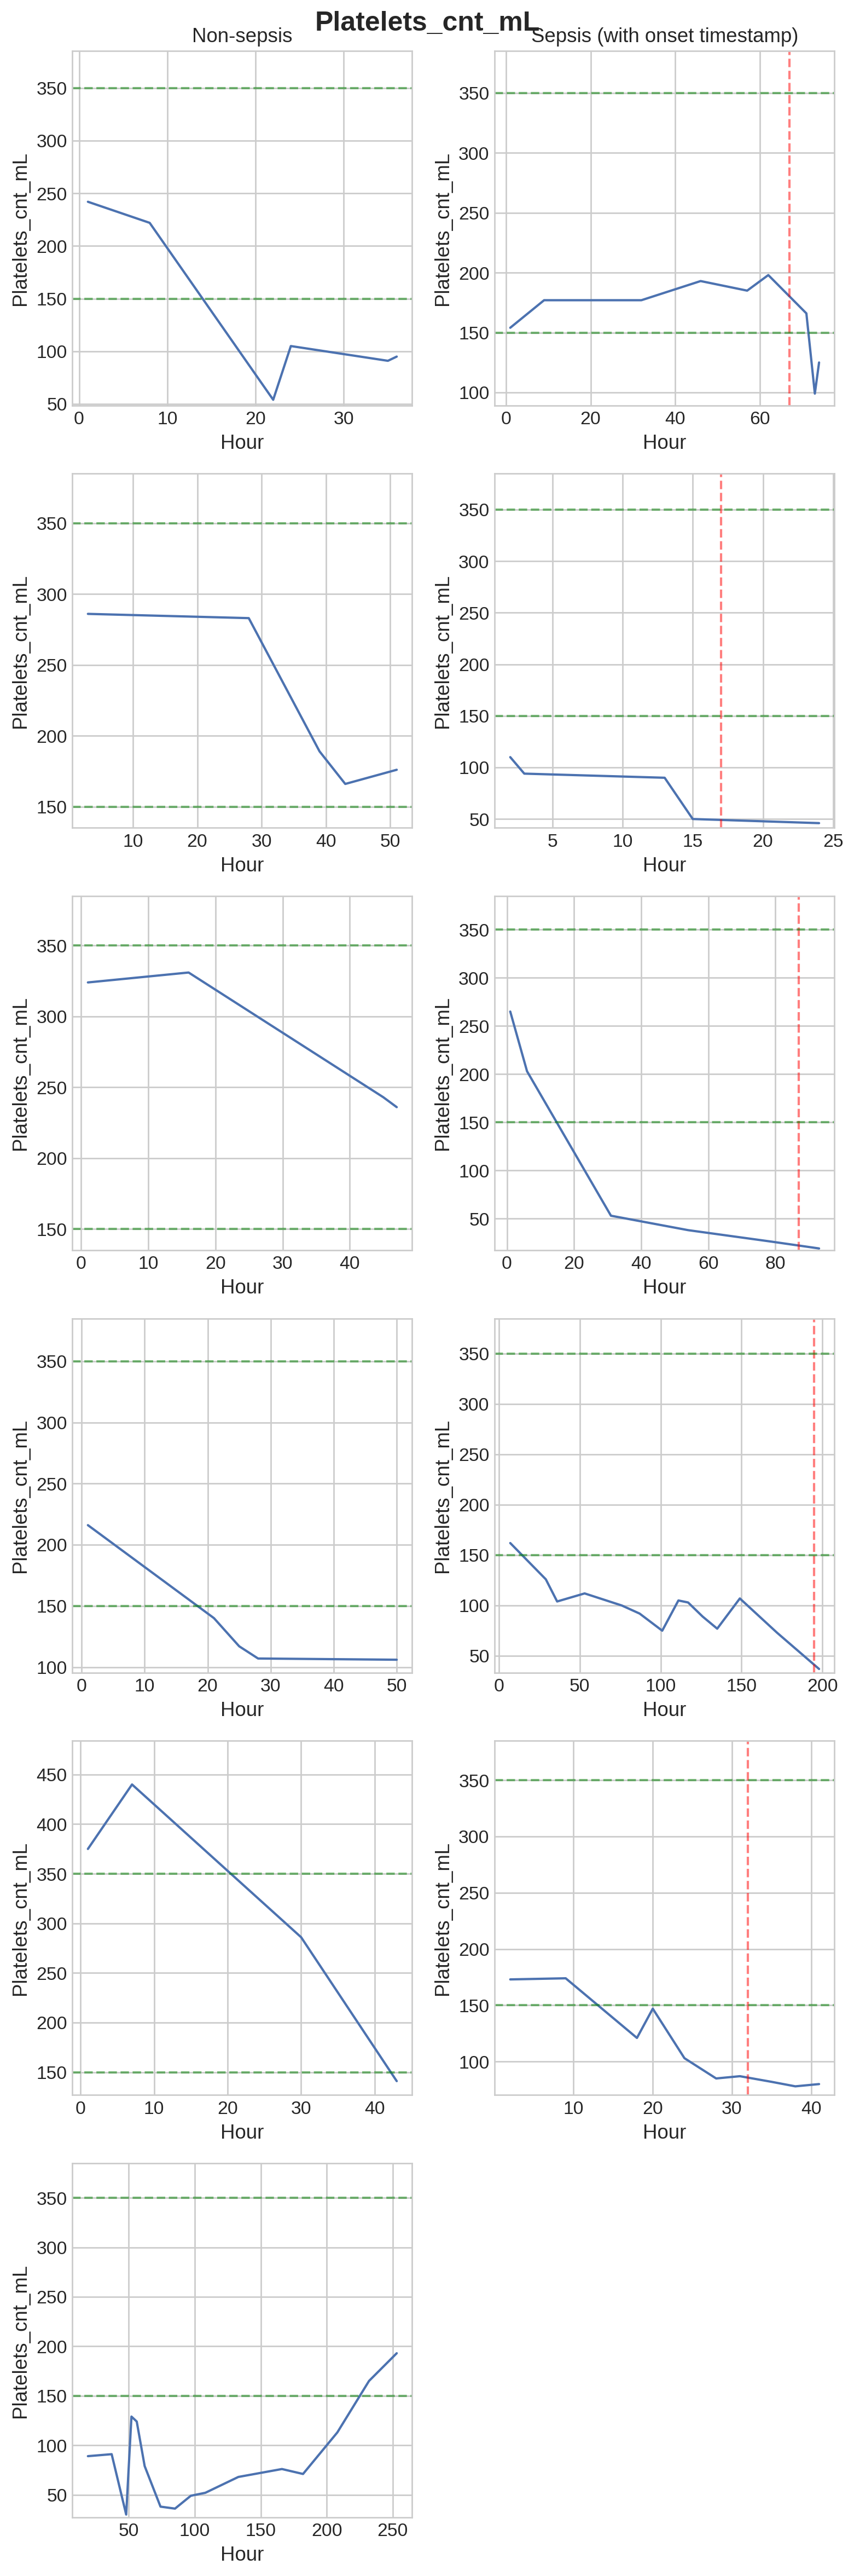

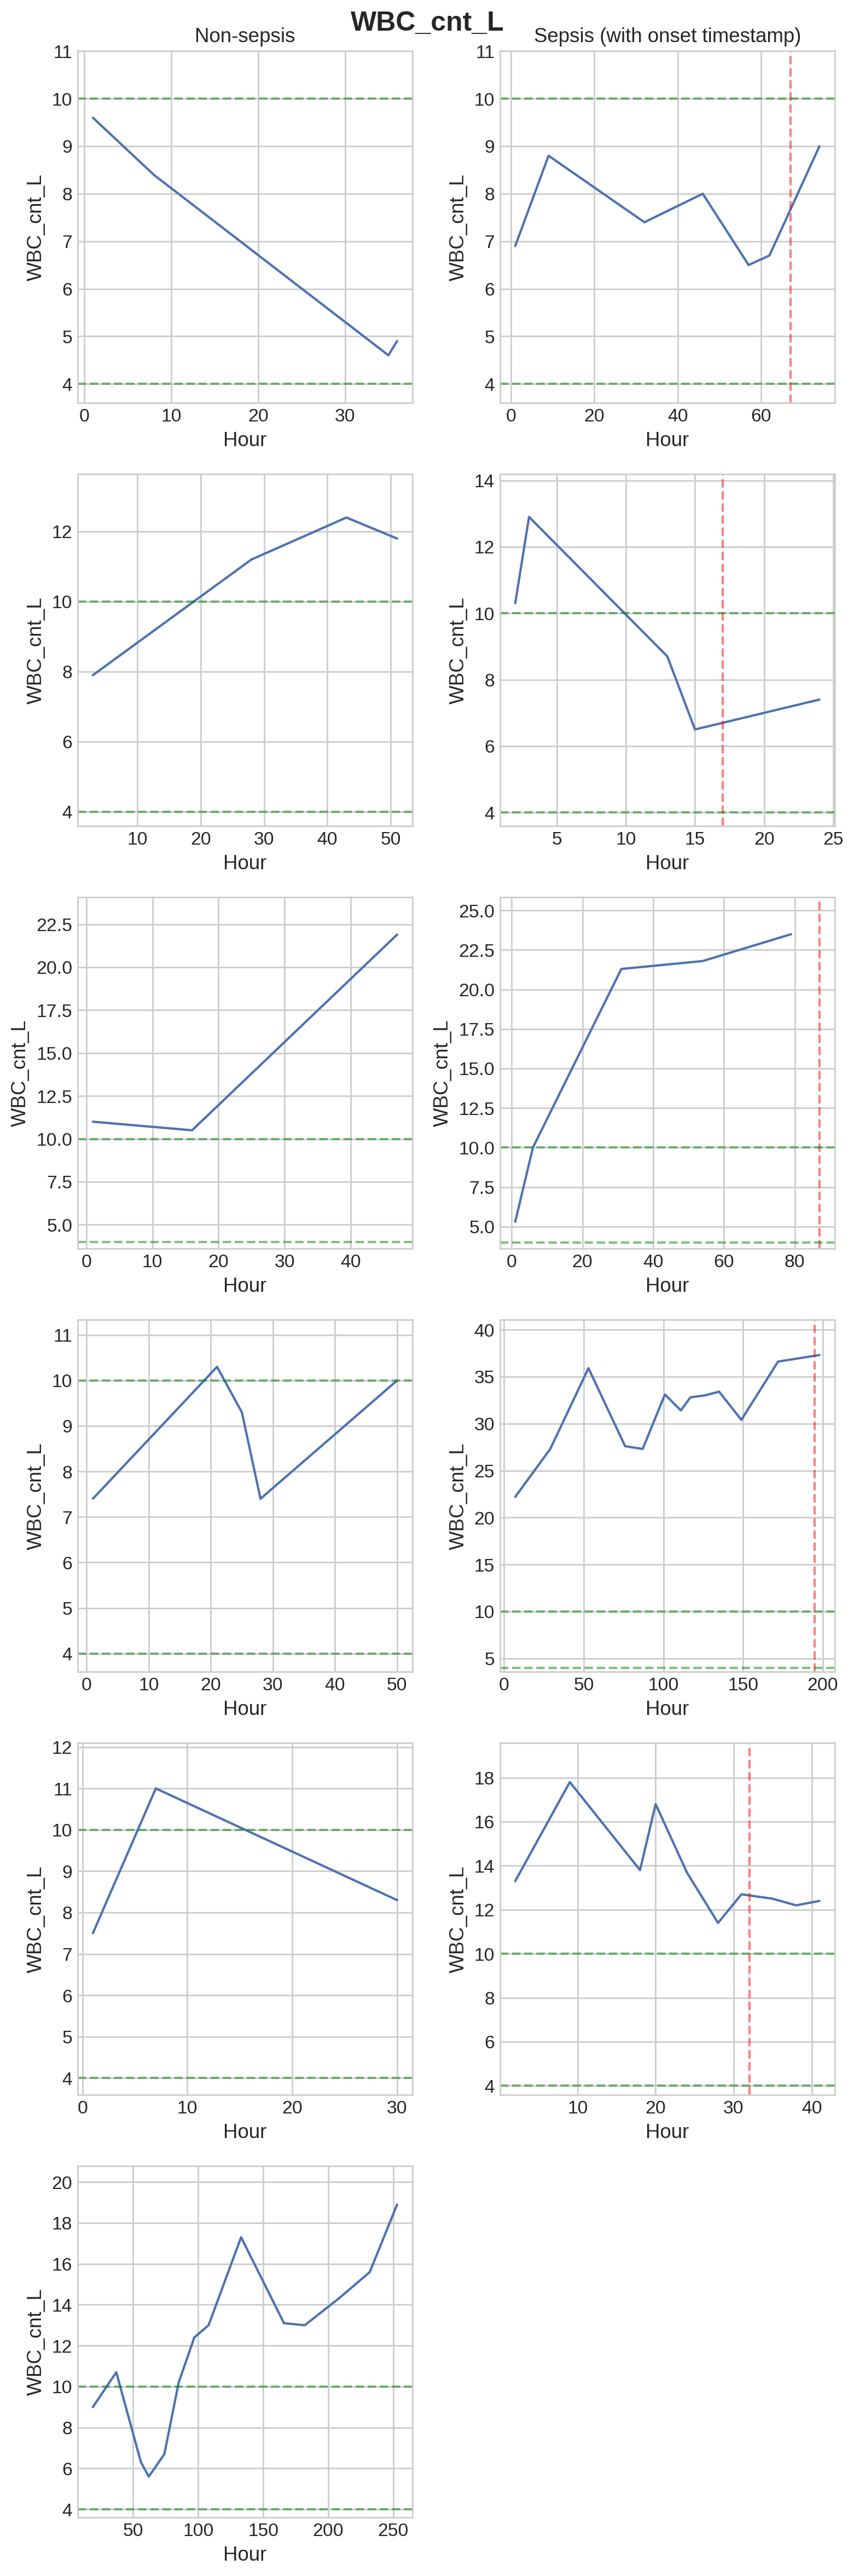

In [28]:
mpl.style.use(['seaborn-v0_8-whitegrid'])
for feature in ['Lactate_mg_dL', 'Platelets_cnt_mL', 'WBC_cnt_L']:
    feature_lineplots(feature, complete_cases)

**Discussion**
* *Lactate levels*: The sepsis and non-sepsis groups display different patterns. In Non-sepsis patients, an initial increase is followed by a decrease, while in the sepsis patients, an initial decrease is followed by an increase. Overall, all these patients have lactate levels within normal limitis. Interestingly, research has found that normal lactate levels are predictive of sepsis outcomes, and there is a threshold of about 1.4 mmol/L ( 12.6 mg/dL) below which the responses to treatment are favorable ([Wacharasint P. et al](https://pubmed.ncbi.nlm.nih.gov/22552014/))
* *Platelet counts:* Again, there are different patterns in the two groups. In non-sepsis patients, platelet counts decrease (to be expected), but then in most cases, the counts bounce back to normal levels. In sepsis patients, on the other hand, platelet counts decrease and tend to remain at thrombocytopenic levels, below 100,000/$\mu$L
* *White blood cell counts (WBC):* The patterns here are not as distinct; knowledge of the WBC differential (neutrophils, lymphocytes, etc), easily obtained from a peripheral smear, would provide additional insights, but is not available here. In general, WBC levels for sepsis patients tend to remain above 10,000/$\mu$L.

**Feature selection**

*RandomForest classifier*

In order to identify features that are most likely to affect the outcome, a random forest (RF) classifier is used on the 40336-patient dataset. RFs are a great ML tool, as they work well out-of-the-box, and handle missing data and imbalanced classes. 

For this analysis, some features are removed a priori; heart rate, respiratin rate, and blood pressure are deemed to be either non-specific, or rather influenced by the hospital environment (a confounding factor). For example, it is very likely that heart rate and blood pressure are elevated in a hospital setting (nobody likes to be in the hospital).

After the classifier is trained, it returns a variable importance, i.e., a ranking of the features based on their importance in the model.

In [29]:
clust_data = df1.drop(['SepsisLabel','Patient_ID','TotalTime_hrs','HR_mean','Resp_rate_mean', 'SBP_mmHg_mean','DBP_mmHg_mean','MAP_mmHg_mean'], axis = 1)
X = clust_data.values
features = clust_data.columns.tolist()
y = df1['SepsisLabel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train, y_train)
print('The random forest accuracy on the test set is: ',np.round(rf.score(X_test, y_test),3))

varimp = pd.DataFrame({'Feature': features, 'Importance':rf.feature_importances_})
varimp = varimp.sort_values(by ='Importance', ascending = False)
varimp.head(10)

The random forest accuracy on the test set is:  0.932


,Feature,Importance
1,Temp_degC_mean,0.067730
5,FiO2_%_mean,0.062021
17,Lactate_mg_dL_mean,0.050795
10,BUN_mg_dL_mean,0.046364
7,PaCO2_mmHg_mean,0.042843
26,WBC_cnt_L_mean,0.042478
28,Platelets_cnt_mL_mean,0.041856
14,Creatinine_mg_dL_mean,0.041260
6,pH_mean,0.040881
12,Calcium_mg_dL_mean,0.039704


**Observation.** The random forest classifier ranks temperature, lactate, the fraction of inspired oxygen, platelet count, WBC, and creatinine among the top 10 features.

Next, with the caveat that neither K-means clustering nor Principal Component Analysis (PCA) inherently perform feature selection, the two techniques will be used to see if additional insight can be obtained from the data. Both techniques share a common goal of simplifying complex datasets, by identifying patterns and grouping similar data points together; they also require that all missing values be removed.

K-means groups data points based on some measure of similarity, using the original features of the data. PCA transforms the original features into a **new** set of uncorrelated features. Geometrically speaking, these new features are projections of the original features onto the PCA axes. True feature selection involves choosing a subset of the original features based on their relevance to the target variable, whereas PCA creates new features that are combinations of the original ones. PCA is indeed useful when features are highly correlated, but here, with so much missing data, it is difficult to tell if that is the case. 

*K-means clustering* 

A K-means clustering task will be applied on the small dataset of 11 patients. Note, however, that this dataset does not have the same class representation as the 40336-patient dataset, where only about 7% of the patients have sepsis.

Will K-means identify the two patient clusters? Which features are most useful, and which are noise? 

To prepare the data for clustering, the patient ID column and the label column are dropped. The former is not needed, the latter  is the outcome. The data is then scaled (normalized). Feature scaling is essential for clustering because it ensures that no single feature dominates the distance calculations.

In [30]:
clust_data = complete_cases.drop(['SepsisLabel','Patient_ID'], axis = 1)
X = StandardScaler().fit_transform(clust_data.values)

k_means = KMeans(n_clusters=2, init='k-means++', n_init=20)
k_means.fit(X)
labels = k_means.labels_

clustering_results = complete_cases.iloc[:,[0,2]]
clustering_results['km_labels'] = labels.tolist()
clustering_results

,Patient_ID,SepsisLabel,km_labels
20466,100131.0,0,0
23181,102846.0,0,0
23542,103207.0,1,0
24788,104453.0,0,0
26749,106414.0,0,0
28247,107912.0,1,1
28861,108526.0,0,0
29483,109148.0,1,0
32751,112416.0,1,1
34503,114168.0,0,1


**Observation.** On this small dataset, with all features, K-means misclassifies 3 patients.

What if only some of the features, such as, lactate, WBC, Platelets, age, gender are selected -- will the results improve? Also, is n = 2 the best number of clusters?

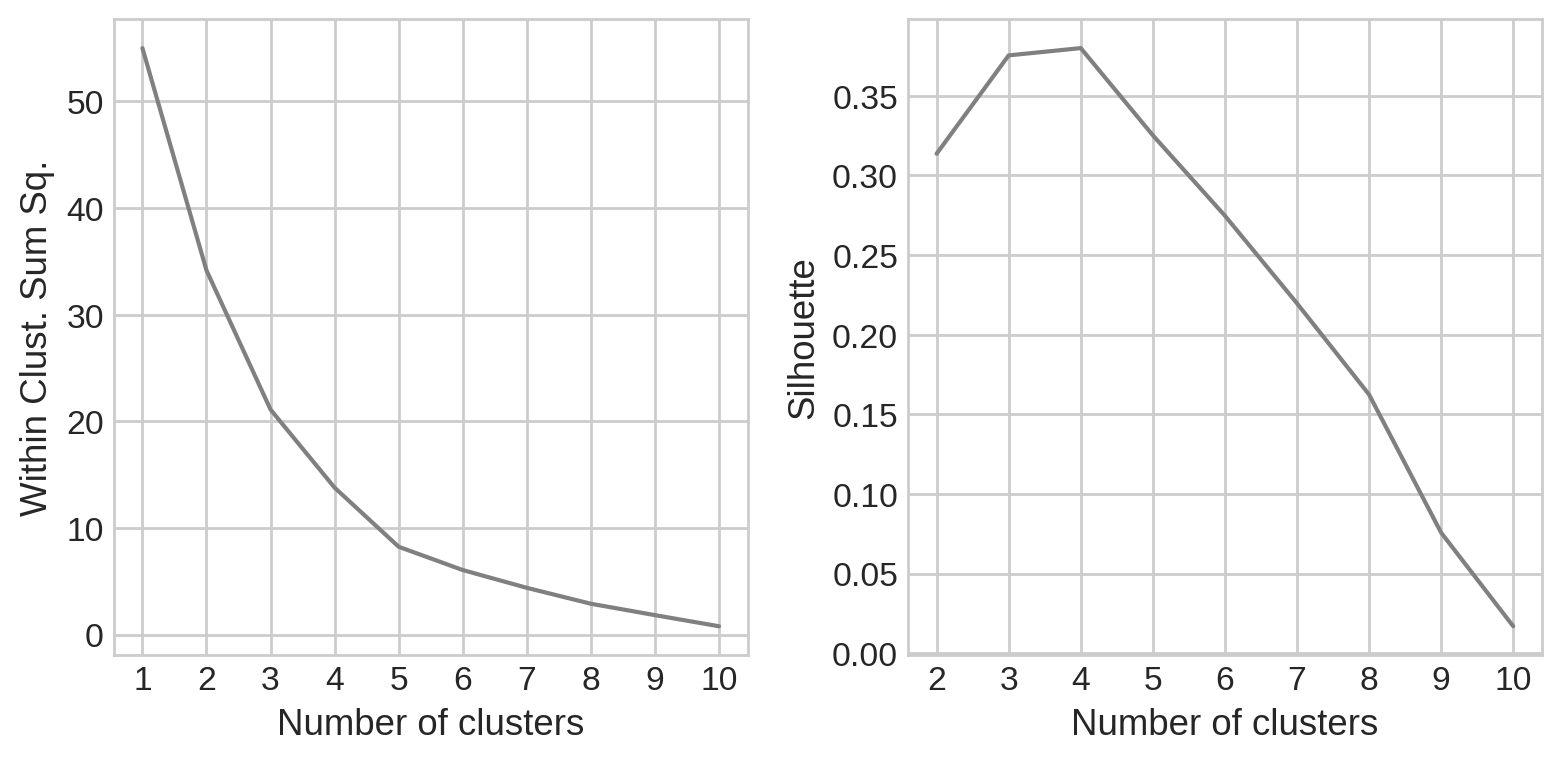

,Patient_ID,SepsisLabel,km_labels
20466,100131.0,0,0
23181,102846.0,0,0
23542,103207.0,1,0
24788,104453.0,0,0
26749,106414.0,0,0
28247,107912.0,1,1
28861,108526.0,0,0
29483,109148.0,1,0
32751,112416.0,1,1
34503,114168.0,0,0


In [31]:
cols = complete_cases.columns
selection = cols[cols.str.contains('Lactate') | cols.str.contains('WBC') | cols.str.contains('Platelets')].tolist()
selection.append('Age')
selection.append('Gender')
clust_data_1 = complete_cases[selection]

# scale data
X = StandardScaler().fit_transform(clust_data_1.values)

k_means = KMeans(n_clusters=2, init='k-means++', n_init=20, random_state = 1)
k_means.fit(X)
labels = k_means.labels_
clustering_results['km_labels'] = labels.tolist()

from sklearn.metrics import silhouette_score
sse = []
silh = []
clusters = np.arange(1,11)
kmeans_kwargs ={'init':'k-means++', 'n_init': 20, 'random_state': 1}
for k in clusters:
    k_means = KMeans(n_clusters=k, **kmeans_kwargs)
    k_means.fit(X)
    sse.append(k_means.inertia_)
    if k > 1:
        silh.append(silhouette_score(X, k_means.labels_, metric='euclidean'))

# Visualize results
fig, axs = plt.subplots(1,2, figsize=(8,4))
axs[0].plot(clusters, sse, color = 'grey')
axs[0].set_xlabel("Number of clusters")
axs[0].set_ylabel("Within Clust. Sum Sq.")
axs[0].set_xticks(clusters)
axs[1].plot(clusters[1:], silh, color = 'grey')
axs[1].set_xlabel('Number of clusters')
axs[1].set_ylabel('Silhouette')
axs[1].set_xticks(clusters[1:])
plt.tight_layout()
plt.show()

clustering_results

**Observations** 

* The elbow method indicates that n = 3 is optimal; the silhoutte scores are too low to be reliable
* With n = 2 clusters, the best k-means can do is classify 9 patients correctly, and misclassify two patients (103207 and 109148)
* This short analysis suggests that lactate, platelet counts, WBC, age and gender may be the most important predictors. The fact that the results improved after selecting some of the features indicate that some noise was removed from the data.

**Principal component analysis**

In [32]:
X = StandardScaler().fit_transform(clust_data.values[:,1:])
pca = PCA(n_components = 2).fit(X)
X_pca = pca.transform(X)

pca_df = pd.DataFrame(data = abs(pca.components_.T), columns=['PC_1','PC_2'])

pca_df['features']=clust_data.columns.tolist()[1:]
pca_df.sort_values(by = 'PC_1', ascending = False).head(10)

,PC_1,PC_2,features
24,0.278908,0.018171,Phosphate_mg_dL_mean
9,0.276687,0.054368,HCO3_mmol_L_mean
8,0.276118,0.059180,BaseExcess_mmol_L_mean
22,0.241732,0.055442,Lactate_mg_dL_mean
20,0.236460,0.075477,Bilirubin_direct_mg_dL_mean
14,0.232176,0.079476,AST_IU_L_mean
26,0.230721,0.117595,Bilirubin_total_mg_dL_mean
19,0.227661,0.031297,Creatinine_mg_dL_mean
5,0.220215,0.127061,DBP_mmHg_mean
32,0.213148,0.066595,Fibrinogen_mg_dL_mean


**Observation**. This analysis  suggests that lactate and WBC are important predictors, and so are phosphate levels, bilirubin, and creatinine.
Note that selecting two principal components only explains 40% - 50% of the variance in the data. In order to explain 95% of the variance, 8 principal components are needed, as shown below. The explained variance ratio helps in assessing the contribution of each principal component to the overall variance of the dataset, aiding in the decision-making process for retaining significant components. Also, this is one reason data is scaled prior to PCA.

In [33]:
print('PCA with 2 components explains ',round(pca.explained_variance_ratio_.sum(),3), ' of the variance')

PCA with 2 components explains  0.488  of the variance


In [34]:
pca = PCA(n_components=0.95)
print('Number of principal components needed to explain 95% of the variance in the data: ', pca.fit_transform(X).shape[1])

Number of principal components needed to explain 95% of the variance in the data:  8


## Hypothesis testing
This section aims to answer the following questions:
1. Are patient ages different between the two diagnostic groups?
2. Is there an association between gender and the likelihood to be diagnosed with sepsis?

**Question 1: Are patient ages different in the two diagnostic groups, sepsis and non-sepsis?**


<Axes: ylabel='Density'>

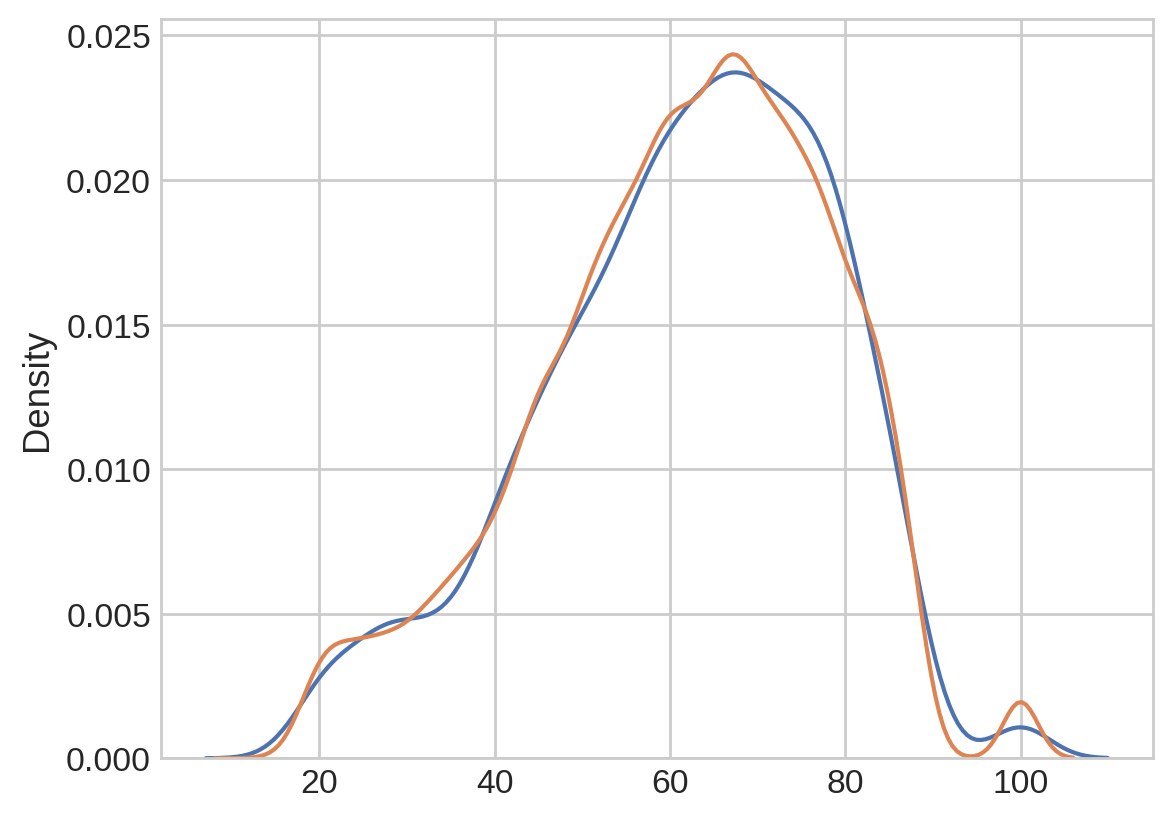

In [35]:
sepsis_age = df1.loc[df1['SepsisLabel'] == 1,'Age'].to_list()
nonsepsis_age = df1.loc[df1['SepsisLabel'] == 0,'Age'].to_list()

sns.distplot(sepsis_age, hist = False)
sns.distplot(nonsepsis_age, hist = False)

Based on the histograms, it seems that the age distributions are similar between the two groups, *sepsis* and *non-sepsis*. A t-test will tell me if they are statistically the same or not.

Let $\mu_0$ = mean age in the non-sepsis group, and $\mu_1$ = the mean age in the sepsis group. The null and alternate hypotheses are:

$H_0: \mu_0 = \mu_1$ (mean ages are the same in the two groups)

$H_A: \mu_0 \ne \mu_1$ (mean ages are different in the two groups)

The t-test concludes that there is no difference between the patient ages:

In [36]:
alpha=0.05
t_value1, p_value1 = stats.ttest_ind(sepsis_age, nonsepsis_age)
t_value1= np.round(t_value1,4)
p_value1 = p_value1.round(4)
print("t_value1 = ",t_value1, ", p_value1 = ", p_value1)

if p_value1 <alpha:
    print("Conclusion: p_value < alpha, therefore reject the null hypothesis that there is no difference between mean ages.")
    
else:
    print("Conclusion: p_value > alpha, therefore accept the null hypothesis that there is no difference between patient ages in the two groups.")

t_value1 =  1.2078 , p_value1 =  0.2271
Conclusion: p_value > alpha, therefore accept the null hypothesis that there is no difference between patient ages in the two groups.


**Question 2: Is there a statistically significant association between gender and likelihood of sepsis?**

A chi-square test of independence will be used to determine if there is a significant association between gender and the likelihood of developing sepsis. Data will be categorized into a contingency table, where one dimension represents gender and the other represents the presence or absence of sepsis. The Chi-square test will then compare the observed frequencies in the data with the expected frequencies if there were no association between gender and a sepis diagnosis.

Note that the chi-square test is a non-parametric test--it does not assume a normal distribution of the data, making it suitable for categorical data like gender and disease status.

Calculate some conditional probabilities first, using the data.

In [37]:
df1.groupby('Gender')['SepsisLabel'].value_counts()

Gender  SepsisLabel
0       0              16577
        1               1193
1       0              20827
        1               1739
Name: count, dtype: int64

In [38]:
p_sepsis_female = np.round(1193/(16577+1193),3)
p_sepsis_male = np.round(1739/(20827+1739),3)
print(p_sepsis_female, p_sepsis_male)

0.067 0.077


Based on this dataset, males seem more likely to develop sepsis: P(sepsis|male) > P(sepsis|female)

Construct the contingency table.

In [39]:
contingency = pd.crosstab(df1.SepsisLabel, df1.Gender)
print(contingency)

Gender           0      1
SepsisLabel              
0            16577  20827
1             1193   1739


<Axes: ylabel='SepsisLabel'>

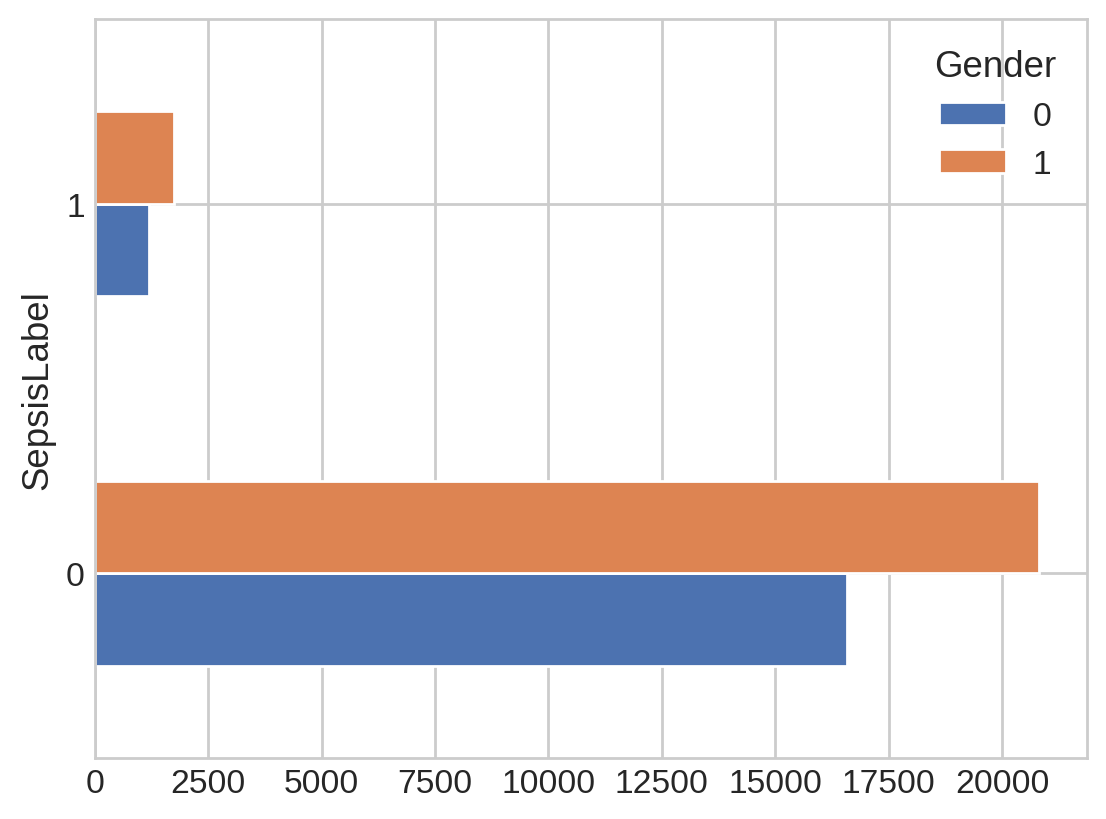

In [40]:
contingency.plot(kind='barh')

**Hypothesis formulation**

$H_0$: Sepsis diagnosis is independent of gender

$H_A$: There is an association between gender and the likelihood pf sepsis.

As shown below, the chi-squared test concludes that there is a statistically significant association between gender and sepsis diagnosis. 

In [41]:
from scipy.stats import chi2_contingency
chi2, p_val, dof, exp_freq = chi2_contingency(contingency, correction = False)
p_val = np.round(p_val,4)
chi2 = np.round(chi2,4)
print('chi-square statistic: {} , p_value: {}'.format(chi2, p_val))

if (p_val < 0.05):
    print('Reject the null hypothesis ...')
else:
    print('Accept the null hypothesis ...')

chi-square statistic: 14.5348 , p_value: 0.0001
Reject the null hypothesis ...


# Conclusions

In this brief exploratory analysis of a dataset that was part of a computing challenge, I have found that
* a number of features are lileky important in the early prediction of sepsis: lactate, platelet count, white blood cell (WBC) count
* other potentially useful predictors are phosphate, creatinine, and fibrinogen
* sepsis is a relatively rare event, occurring in about 7% of the patient population
* age is not significantly associated with the likelihood of developing sepsis
* gender is significantly associated with the likelihood of developing sepsis
* it would be interesting to see the effect of more granularity in some of the features; for example, inclduing a WBC differential, where the proportion of the different types of white cells is known

**Notes.** Lactate is a salt of lactic acid produced mainly by the breakdown of glucose under anaerobic conditions, recognized as a significant marker of inflammation due to its accumulation in tissues during inflammatory processes. Creatinine is not regarded as an inflammation marker, but is produced by muscle breakdown. However, certain disease state accelerate muscle breakdown. Phosphate is increasingly associated with inflammation and cardiovascular disease [[1]](https://pmc.ncbi.nlm.nih.gov/articles/PMC7796315/)[[2]](https://pmc.ncbi.nlm.nih.gov/articles/PMC10578301/). WBC is a well-known marker of inflammatory processes, but is not specific to sepsis. Fibrinogen is recognized as a biomarker of inflammation, indicating the presence of inflammatory conditions or infections in the body. And platelets play significant roles in inflammation and immune responses, acting as more than just mediators of blood clotting [[3]](https://ashpublications.org/blood/article/123/18/2759/32501/Emerging-roles-for-platelets-as-immune-and).